# Machine Learning

In this file, instructions how to approach the challenge can be found.

We are going to work on different types of Machine Learning problems:

- **Regression Problem**: The goal is to predict delay of flights.
- **(Stretch) Multiclass Classification**: If the plane was delayed, we will predict what type of delay it is (will be).
- **(Stretch) Binary Classification**: The goal is to predict if the flight will be cancelled.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


## Main Task: Regression Problem

The target variable is **ARR_DELAY**. We need to be careful which columns to use and which don't. For example, DEP_DELAY is going to be the perfect predictor, but we can't use it because in real-life scenario, we want to predict the delay before the flight takes of --> We can use average delay from earlier days but not the one from the actual flight we predict.  

For example, variables **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY** shouldn't be used directly as predictors as well. However, we can create various transformations from earlier values.

We will be evaluating your models by predicting the ARR_DELAY for all flights **1 week in advance**.

In [2]:
df_flights = pd.read_csv('data/df_sample_1_subset.csv')

In [3]:
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,2019-01-08,DL,DL_CODESHARE,4179,OO,N477CA,4179,10408,ATW,"Appleton, WI",...,1,296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-05-04,UA,UA,374,UA,N61882,374,12264,IAD,"Washington, DC",...,1,588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-02-11,AA,AA_CODESHARE,5254,OH,N207PS,5254,12197,HPN,"White Plains, NY",...,1,234,1.0,0.0,13.0,0.0,52.0,0.0,0.0,0.0
3,2018-01-16,DL,DL_CODESHARE,7409,OO,N675BR,7409,11013,CIU,"Sault Ste. Marie, MI",...,1,284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27,WN,WN,2360,WN,N7812G,2360,10800,BUR,"Burbank, CA",...,1,358,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0


In [4]:
df_flights.isnull().sum()

fl_date                0
mkt_unique_carrier     0
branded_code_share     0
mkt_carrier_fl_num     0
op_unique_carrier      0
tail_num               0
op_carrier_fl_num      0
origin_airport_id      0
origin                 0
origin_city_name       0
dest_airport_id        0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
first_dep_time         0
total_add_gtime        0
longest_add_gtime      0
dtype: int64

## Separating the arr_delay which we want to predict

In [5]:
# Separate the predicted variable (arr_delay)
y = df_flights['arr_delay']

# Remove the predicted variable from the dataframe
X = df_flights.drop('arr_delay', axis=1)

## Test Train Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 12)

In [7]:
X_train.shape,X_test.shape

((119999, 36), (30000, 36))

## Feature Engineering

### Adding taxi out mean timer per hour as feature

In [8]:

# Convert 'dep_time' to datetime format
X_train['dep_time'] = pd.to_datetime(X_train['dep_time'], format='%H%M', errors='coerce')
X_test['dep_time'] = pd.to_datetime(X_test['dep_time'], format='%H%M', errors='coerce')

# Calculate mean taxi time per hour
X_train['taxi_mean_time'] = X_train.groupby(X_train['dep_time'].dt.hour)['taxi_out'].transform('mean')
X_test['taxi_mean_time'] = X_test.groupby(X_test['dep_time'].dt.hour)['taxi_out'].transform('mean')



In [9]:
X_train.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,taxi_mean_time
137756,2019-04-05,AA,AA_CODESHARE,5398,OH,N593NN,5398,11057,CLT,"Charlotte, NC",...,416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.810807
12616,2019-09-29,UA,UA,1482,UA,N447UA,1482,13930,ORD,"Chicago, IL",...,723,13.0,0.0,0.0,0.0,79.0,0.0,0.0,0.0,17.023382
119262,2018-09-28,HA,HA,8,HA,N388HA,8,12173,HNL,"Honolulu, HI",...,2762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.655672
7808,2018-09-25,WN,WN,5662,WN,N925WN,5662,11292,DEN,"Denver, CO",...,883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.278131
68778,2018-04-23,WN,WN,5391,WN,N273WN,5391,15304,TPA,"Tampa, FL",...,842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.762362


In [10]:
X_train.isna().sum()

fl_date                  0
mkt_unique_carrier       0
branded_code_share       0
mkt_carrier_fl_num       0
op_unique_carrier        0
tail_num                 0
op_carrier_fl_num        0
origin_airport_id        0
origin                   0
origin_city_name         0
dest_airport_id          0
dest                     0
dest_city_name           0
crs_dep_time             0
dep_time               110
dep_delay                0
taxi_out                 0
wheels_off               0
wheels_on                0
taxi_in                  0
crs_arr_time             0
arr_time                 0
cancelled                0
crs_elapsed_time         0
actual_elapsed_time      0
air_time                 0
flights                  0
distance                 0
carrier_delay            0
weather_delay            0
nas_delay                0
security_delay           0
late_aircraft_delay      0
first_dep_time           0
total_add_gtime          0
longest_add_gtime        0
taxi_mean_time         110
d

### Repalcing Nan with mean

In [11]:
# Calculate the overall mean of the 'taxi_out' column
overall_mean_dep_time_x_train = X_train['dep_time'].mean()
overall_mean_dep_time_x_test = X_test['dep_time'].mean()
# Calculate mean taxi time per hour using map function

X_train['dep_time'].replace(np.nan,overall_mean_dep_time_x_train, inplace=True)
X_test['dep_time'].replace(np.nan,overall_mean_dep_time_x_test, inplace=True)

In [12]:
# Calculate the overall mean of the 'taxi_out' column
overall_mean_taxi_out_x_train = X_train['taxi_out'].mean()
overall_mean_taxi_out_x_test = X_test['taxi_out'].mean()
# Calculate mean taxi time per hour using map function

X_train['taxi_mean_time'].replace(np.nan,overall_mean_taxi_out_x_train, inplace=True)
X_test['taxi_mean_time'].replace(np.nan,overall_mean_taxi_out_x_test, inplace=True)

In [13]:
X_train.isna().sum()

fl_date                0
mkt_unique_carrier     0
branded_code_share     0
mkt_carrier_fl_num     0
op_unique_carrier      0
tail_num               0
op_carrier_fl_num      0
origin_airport_id      0
origin                 0
origin_city_name       0
dest_airport_id        0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
cancelled              0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
first_dep_time         0
total_add_gtime        0
longest_add_gtime      0
taxi_mean_time         0
dtype: int64

In [14]:
X_train['dep_time'] = pd.to_datetime(X_train['dep_time']).dt.strftime('%H%M')
X_test['dep_time'] = pd.to_datetime(X_test['dep_time']).dt.strftime('%H%M')


### Explornig date time - Extract year , month , day of month, day of week

In [15]:
# Explorinig date time - Extract year , month , day of month, day of week

X_train['fl_date'] = pd.to_datetime(X_train['fl_date'], errors='coerce')
X_train['year'] = X_train['fl_date'].dt.year
X_train['month'] = X_train['fl_date'].dt.month
X_train['day_of_month'] = X_train['fl_date'].dt.day
X_train['day_of_week'] = X_train['fl_date'].dt.dayofweek
X_train['dep_hour'] = X_train['crs_dep_time'] // 100


X_test['fl_date'] = pd.to_datetime(X_test['fl_date'], errors='coerce')
X_test['year'] = X_test['fl_date'].dt.year
X_test['month'] = X_test['fl_date'].dt.month
X_test['day_of_month'] = X_test['fl_date'].dt.day
X_test['day_of_week'] = X_test['fl_date'].dt.dayofweek
X_test['dep_hour'] = X_test['crs_dep_time'] // 100



In [16]:
X_train.isna().sum()

fl_date                0
mkt_unique_carrier     0
branded_code_share     0
mkt_carrier_fl_num     0
op_unique_carrier      0
tail_num               0
op_carrier_fl_num      0
origin_airport_id      0
origin                 0
origin_city_name       0
dest_airport_id        0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
cancelled              0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
first_dep_time         0
total_add_gtime        0
longest_add_gtime      0
taxi_mean_time         0
year                   0
month                  0
day_of_month           0


In [17]:
# Create a new column for the time of day
X_train['time_of_day'] = ''
X_train.loc[(X_train['dep_hour'] >= 0) & (X_train['dep_hour'] < 6), 'time_of_day'] = 'night'
X_train.loc[(X_train['dep_hour'] >= 6) & (X_train['dep_hour'] < 12), 'time_of_day'] = 'morning'
X_train.loc[(X_train['dep_hour'] >= 12) & (X_train['dep_hour'] < 18), 'time_of_day'] = 'afternoon'
X_train.loc[(X_train['dep_hour'] >= 18) & (X_train['dep_hour'] <= 24), 'time_of_day'] = 'evening'

X_test['time_of_day'] = ''
X_test.loc[(X_test['dep_hour'] >= 0) & (X_test['dep_hour'] < 6), 'time_of_day'] = 'night'
X_test.loc[(X_test['dep_hour'] >= 6) & (X_test['dep_hour'] < 12), 'time_of_day'] = 'morning'
X_test.loc[(X_test['dep_hour'] >= 12) & (X_test['dep_hour'] < 18), 'time_of_day'] = 'afternoon'
X_test.loc[(X_test['dep_hour'] >= 18) & (X_test['dep_hour'] <= 24), 'time_of_day'] = 'evening'

### Calculates the departure traffic for each origin airport per day 

In [18]:
X_train['dep_traffic_per_day'] = X_train.groupby(["origin", "fl_date"])["flights"].transform('sum')
X_test['dep_traffic_per_day'] = X_test.groupby(["origin", "fl_date"])["flights"].transform('sum')

In [19]:
X_test.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,...,total_add_gtime,longest_add_gtime,taxi_mean_time,year,month,day_of_month,day_of_week,dep_hour,time_of_day,dep_traffic_per_day
48488,2018-02-09,AA,AA,103,AA,N866NN,103,11298,DFW,"Dallas/Fort Worth, TX",...,0.0,0.0,17.563717,2018,2,9,4,11,morning,4
42072,2018-11-14,UA,UA_CODESHARE,6017,YV,N80348,6017,10140,ABQ,"Albuquerque, NM",...,0.0,0.0,16.801774,2018,11,14,2,12,afternoon,1
35120,2018-03-07,AA,AA_CODESHARE,5886,YV,N955LR,5886,13277,MGM,"Montgomery, AL",...,0.0,0.0,15.859143,2018,3,7,2,5,night,1
4627,2019-09-04,DL,DL_CODESHARE,3820,OO,N268SY,3820,12953,LGA,"New York, NY",...,0.0,0.0,17.547739,2019,9,4,2,21,evening,3
38836,2019-04-14,G4,G4,2109,G4,260NV,2109,14025,PBG,"Plattsburgh, NY",...,0.0,0.0,17.539798,2019,4,14,6,10,morning,1


### Creating feature average delay per airline

In [20]:
# Calculate average departure delay per airline
average_delay_per_airline_x_train = X_train.groupby('mkt_unique_carrier')['dep_delay'].mean()
average_delay_per_airline_x_test = X_test.groupby('mkt_unique_carrier')['dep_delay'].mean()

# Map the average delay values to the corresponding airlines
X_train['avg_delay_per_airline'] = X_train['mkt_unique_carrier'].map(average_delay_per_airline_x_train)
X_test['avg_delay_per_airline'] = X_test['mkt_unique_carrier'].map(average_delay_per_airline_x_test)


In [21]:
X_train.head(5)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,...,longest_add_gtime,taxi_mean_time,year,month,day_of_month,day_of_week,dep_hour,time_of_day,dep_traffic_per_day,avg_delay_per_airline
137756,2019-04-05,AA,AA_CODESHARE,5398,OH,N593NN,5398,11057,CLT,"Charlotte, NC",...,0.0,16.810807,2019,4,5,4,13,afternoon,6,9.929083
12616,2019-09-29,UA,UA,1482,UA,N447UA,1482,13930,ORD,"Chicago, IL",...,0.0,17.023382,2019,9,29,6,9,morning,13,12.683598
119262,2018-09-28,HA,HA,8,HA,N388HA,8,12173,HNL,"Honolulu, HI",...,0.0,16.655672,2018,9,28,4,22,evening,4,0.900568
7808,2018-09-25,WN,WN,5662,WN,N925WN,5662,11292,DEN,"Denver, CO",...,0.0,18.278131,2018,9,25,1,20,evening,8,10.736714
68778,2018-04-23,WN,WN,5391,WN,N273WN,5391,15304,TPA,"Tampa, FL",...,0.0,16.762362,2018,4,23,0,14,afternoon,3,10.736714


### Creating feature - average monthly passengers

In [22]:
# Calling function from data_cleaning 

from data_cleaning import avg_passengers


In [23]:
# loading passengers csv into dataframe
passengers = pd.read_csv('data/passengers.csv')

In [24]:
# Calling function with flights and passengers dataframe

X_train = avg_passengers(X_train,passengers)
X_test = avg_passengers(X_test,passengers)

In [25]:
X_test.head(5)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,...,taxi_mean_time,year,month,day_of_month,day_of_week,dep_hour,time_of_day,dep_traffic_per_day,avg_delay_per_airline,monthly_avg_passengers
48488,2018-02-09,AA,AA,103,AA,N866NN,103,11298,DFW,"Dallas/Fort Worth, TX",...,17.563717,2018,2,9,4,11,morning,4,10.906822,5490.0
42072,2018-11-14,UA,UA_CODESHARE,6017,YV,N80348,6017,10140,ABQ,"Albuquerque, NM",...,16.801774,2018,11,14,2,12,afternoon,1,13.083106,985.0
35120,2018-03-07,AA,AA_CODESHARE,5886,YV,N955LR,5886,13277,MGM,"Montgomery, AL",...,15.859143,2018,3,7,2,5,night,1,10.906822,1859.0
4627,2019-09-04,DL,DL_CODESHARE,3820,OO,N268SY,3820,12953,LGA,"New York, NY",...,17.547739,2019,9,4,2,21,evening,3,10.182210,1197.0
38836,2019-04-14,G4,G4,2109,G4,260NV,2109,14025,PBG,"Plattsburgh, NY",...,17.539798,2019,4,14,6,10,morning,1,7.945799,1664.0


In [26]:
# Calculate the overall mean of the 'taxi_out' column
overall_mean_monthly_avg_passengers_out_x_train = X_train['monthly_avg_passengers'].mean()
overall_monthly_avg_passengers_out_x_test = X_test['monthly_avg_passengers'].mean()
# Calculate mean taxi time per hour using map function

X_train['monthly_avg_passengers'].replace(np.nan,overall_mean_monthly_avg_passengers_out_x_train, inplace=True)
X_test['monthly_avg_passengers'].replace(np.nan,overall_monthly_avg_passengers_out_x_test, inplace=True)

### Creating feature - average fuel consumption

In [27]:
# loading passengers csv into dataframe
fuel_df = pd.read_csv('data/fuel_comsumption.csv')

In [28]:
# Calling function from data_cleaning 

from data_cleaning import avg_fuel_use

In [29]:
# Calling function with flights and passengers dataframe

X_train = avg_fuel_use(X_train,fuel_df)
X_test = avg_fuel_use(X_test,fuel_df)

In [30]:
X_test.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,...,month,day_of_month,day_of_week,dep_hour,time_of_day,dep_traffic_per_day,avg_delay_per_airline,monthly_avg_passengers,avg_monthly_fuel_gallons,avg_monthly_fuel_cost
48488,2018-02-09,AA,AA,103,AA,N866NN,103,11298,DFW,"Dallas/Fort Worth, TX",...,2,9,4,11,morning,4,10.906822,5490.0,244408174.0,405192822.0
42072,2018-11-14,UA,UA_CODESHARE,6017,YV,N80348,6017,10140,ABQ,"Albuquerque, NM",...,11,14,2,12,afternoon,1,13.083106,985.0,258837871.0,452040276.0
35120,2018-03-07,AA,AA_CODESHARE,5886,YV,N955LR,5886,13277,MGM,"Montgomery, AL",...,3,7,2,5,night,1,10.906822,1859.0,282305086.0,472114756.0
4627,2019-09-04,DL,DL_CODESHARE,3820,OO,N268SY,3820,12953,LGA,"New York, NY",...,9,4,2,21,evening,3,10.182210,1197.0,289410337.0,527534728.0
38836,2019-04-14,G4,G4,2109,G4,260NV,2109,14025,PBG,"Plattsburgh, NY",...,4,14,6,10,morning,1,7.945799,1664.0,15126139.0,29573621.0


In [46]:
X_train.columns

Index(['mkt_unique_carrier', 'origin', 'dest', 'crs_dep_time', 'dep_time',
       'crs_arr_time', 'crs_elapsed_time', 'distance', 'taxi_mean_time',
       'year', 'month', 'day_of_month', 'day_of_week', 'dep_hour',
       'time_of_day', 'dep_traffic_per_day', 'avg_delay_per_airline',
       'monthly_avg_passengers', 'avg_monthly_fuel_gallons'],
      dtype='object')

In [32]:
# Define the list of unnecessary features to drop
unnecessary_features = ['op_unique_carrier','fl_date','dep_delay','branded_code_share', 'tail_num','op_carrier_fl_num','cancelled','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay','total_add_gtime', 'longest_add_gtime','origin_city_name',
                        'dest_city_name','origin_airport_id','dest_airport_id','wheels_off','wheels_on', 'taxi_in', 'arr_time', 'actual_elapsed_time','flights','mkt_carrier_fl_num','air_time','first_dep_time','avg_monthly_fuel_cost','taxi_out']


In [33]:
# Drop the unnecessary features from 
X_train.drop(columns=unnecessary_features, inplace=True)
X_test.drop(columns=unnecessary_features, inplace=True)

In [34]:
X_train.columns

Index(['mkt_unique_carrier', 'origin', 'dest', 'crs_dep_time', 'dep_time',
       'crs_arr_time', 'crs_elapsed_time', 'distance', 'taxi_mean_time',
       'year', 'month', 'day_of_month', 'day_of_week', 'dep_hour',
       'time_of_day', 'dep_traffic_per_day', 'avg_delay_per_airline',
       'monthly_avg_passengers', 'avg_monthly_fuel_gallons'],
      dtype='object')

In [35]:
X_train.dtypes

mkt_unique_carrier           object
origin                       object
dest                         object
crs_dep_time                  int64
dep_time                     object
crs_arr_time                  int64
crs_elapsed_time            float64
distance                      int64
taxi_mean_time              float64
year                          int64
month                         int64
day_of_month                  int64
day_of_week                   int64
dep_hour                      int64
time_of_day                  object
dep_traffic_per_day           int64
avg_delay_per_airline       float64
monthly_avg_passengers      float64
avg_monthly_fuel_gallons    float64
dtype: object

## Combing dataframe and saving after feature engineering

In [36]:
'''
X_train['arr_delay'] = y_train
X_test['arr_delay'] = y_test
df_flights_model = pd.concat([X_train, X_test])
df_flights_model.to_csv('data\df_flights_model.csv',index=False)
'''

"\nX_train['arr_delay'] = y_train\nX_test['arr_delay'] = y_test\ndf_flights_model = pd.concat([X_train, X_test])\ndf_flights_model.to_csv('data\\df_flights_model.csv',index=False)\n"

# Loading df_flights for modeling

In [37]:
'''
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

df_flights = pd.read_csv('data/df_flights_model.csv')

'''

"\nimport numpy as np\nimport pandas as pd\nimport seaborn as sns\nimport scipy.stats as stats\nimport matplotlib.pyplot as plt\nfrom sklearn.preprocessing import MinMaxScaler\nfrom sklearn.model_selection import train_test_split\n\ndf_flights = pd.read_csv('data/df_flights_model.csv')\n\n"

In [38]:
'''
from sklearn.model_selection import train_test_split

# Separate the predicted variable (arr_delay)
y = df_flights['arr_delay']

# Remove the predicted variable from the dataframe
X = df_flights.drop('arr_delay', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
'''

"\nfrom sklearn.model_selection import train_test_split\n\n# Separate the predicted variable (arr_delay)\ny = df_flights['arr_delay']\n\n# Remove the predicted variable from the dataframe\nX = df_flights.drop('arr_delay', axis=1)\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)\n"

### Encoding and scaling

In [39]:

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


# Define the categorical and numerical column names

categorical_cols = ['mkt_unique_carrier', 'origin', 'dest', 'time_of_day']
numerical_cols = ['crs_dep_time', 'dep_time', 'crs_arr_time', 'crs_elapsed_time', 'distance',
                 'taxi_mean_time', 'year', 'month', 'day_of_month', 'day_of_week', 'dep_hour',
                  'dep_traffic_per_day','avg_delay_per_airline',
                  'monthly_avg_passengers', 'avg_monthly_fuel_gallons']

# Create the column transformer for encoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

# Fit and transform the preprocessor on the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Transform the test data using the fitted preprocessor
X_test_preprocessed = preprocessor.transform(X_test)


In [40]:
#X_train_preprocessed

In [41]:
#print(X_train_preprocessed.shape)
#print(X_test_preprocessed.shape)

## Alternate Encoding and Scaling

In [42]:
'''
categorical_vars = X_train.select_dtypes(include=['object','category'])
numeric_vars = X_train.select_dtypes(include=['int64', 'float64'])

X_train_cat = X_train[categorical_vars.columns]
X_train_num = X_train[numeric_vars.columns]


X_test_cat = X_train[categorical_vars.columns]
X_test_num = X_train[numeric_vars.columns]
'''

"\ncategorical_vars = X_train.select_dtypes(include=['object','category'])\nnumeric_vars = X_train.select_dtypes(include=['int64', 'float64'])\n\nX_train_cat = X_train[categorical_vars.columns]\nX_train_num = X_train[numeric_vars.columns]\n\n\nX_test_cat = X_train[categorical_vars.columns]\nX_test_num = X_train[numeric_vars.columns]\n"

In [43]:
'''
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# Categorical variable preprocessing
encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)
'''

'\nfrom sklearn.preprocessing import OneHotEncoder, StandardScaler\n# Categorical variable preprocessing\nencoder = OneHotEncoder()\nencoded_categorical = encoder.fit_transform(X_train_cat)\nX_test_cat_encoded = encoder.transform(X_test_cat)\n'

In [44]:
'''
scaler = StandardScaler()
X_train_numeric_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
'''

'\nscaler = StandardScaler()\nX_train_numeric_scaled = scaler.fit_transform(X_train_num)\nX_test_num_scaled = scaler.transform(X_test_num)\n'

In [45]:
#X_train_preprocessed = pd.concat([pd.DataFrame(encoded_categorical.toarray()), pd.DataFrame(X_train_numeric_scaled)], axis=1)

In [46]:
#X_test_preprocessed = pd.concat([pd.DataFrame(X_test_cat_encoded.toarray()), pd.DataFrame(X_test_num_scaled)], axis=1)


### Feature Engineering

Feature engineering will play a crucial role in this problems. We have only very little attributes so we need to create some features that will have some predictive power.

- weather: we can use some weather API to look for the weather in time of the scheduled departure and scheduled arrival.
- statistics (avg, mean, median, std, min, max...): we can take a look at previous delays and compute descriptive statistics
- airports encoding: we need to think about what to do with the airports and other categorical variables
- time of the day: the delay probably depends on the airport traffic which varies during the day.
- airport traffic
- unsupervised learning as feature engineering?
- **what are the additional options?**: Think about what we could do more to improve the model.

### Modeling

Use different ML techniques to predict each problem.

- linear / logistic / multinomial logistic regression
- Naive Bayes
- Random Forest
- SVM
- XGBoost
- The ensemble of your own choice

## Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lg_model = LinearRegression()

In [48]:
lg_model.fit(X_train_preprocessed, y_train)


LinearRegression()

In [49]:
y_pred_lr = lg_model.predict(X_test_preprocessed)


In [51]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [52]:
print("Mean Squared Error:", mse_lr)
print("Root Mean Squared Error:", rmse_lr)
print("R-squared:", r2_lr)

Mean Squared Error: 2575.9709864808015
Root Mean Squared Error: 50.754024337788245
R-squared: 0.06487125743035527


In [ ]:
import pickle

# Save the trained model to a file
with open('model/linear_regression.pkl', 'wb') as file:
    pickle.dump(lg_model, file)

In [ ]:
# Load the saved model from a file
with open('linear_regression.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

## Random Forrest

In [40]:
from sklearn.ensemble import RandomForestRegressor


In [41]:
rf_model = RandomForestRegressor(n_estimators=100,n_jobs=-1, random_state=42)


In [42]:
rf_model.fit(X_train_preprocessed, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [43]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_preprocessed)



In [44]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R-squared:", r2_rf)


Mean Squared Error: 671.9634119066667
Root Mean Squared Error: 25.922257075854077
R-squared: 0.7560639061049561


# Xgboost

In [58]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error



In [59]:
# Create an instance of the XGBRegressor
# Set the parameters according to your requirements
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)



In [60]:
# Fit the model to the training data
model.fit(X_train_preprocessed, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [61]:
# Make predictions on the test data
y_pred_xgboost = model.predict(X_test_preprocessed)



In [62]:
# Evaluate the model
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
rmse_xgboost = np.sqrt(mse_xgboost)
print("Root Mean Squared Error:", rmse_xgboost)

Root Mean Squared Error: 72.21337204593222


## SVM

In [40]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score



In [41]:
# Create an SVR model
svr_model = SVR(kernel='rbf')

In [42]:
# Train the model
svr_model.fit(X_train_preprocessed, y_train)

SVR()

In [43]:
# Make predictions on the test set
y_pred_svm = svr_model.predict(X_test_preprocessed)

In [44]:
# Evaluation
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("Mean Squared Error:", mse_svm)
print("Root Mean Squared Error:", rmse_svm)
print("R-squared Score:", r2_svm)

Mean Squared Error: 2411.3214667213892
Root Mean Squared Error: 49.10520814253198
R-squared Score: 0.12464231043730745


In [45]:
import pickle

# Save the trained model to a file
with open('model/svr_model.pkl', 'wb') as file:
    pickle.dump(svr_model, file)

In [47]:
y_pred_svm

array([ -5.33893875,  -6.01460876,  -9.14823047, ..., -10.1449285 ,
        27.27378039,  -7.72048235])

In [48]:
results = pd.DataFrame({'fl_date': test_data['fl_date'], 'predictions': y_pred_svm})


NameError: name 'test_data' is not defined

## Xgboost with CV fold

In [46]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Create an instance of the XGBRegressor
# Set the parameters according to your requirements
model_xg = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)


In [49]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model_xg, X_train_preprocessed, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

# Print the cross-validation scores
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean CV RMSE:", cv_rmse_scores.mean())

Cross-Validation RMSE Scores: [23.068065   28.00271631 23.51149221 24.79260957 22.97524918]
Mean CV RMSE: 24.470026451863838


In [50]:
# Fit the model to the training data
model_xg.fit(X_train_preprocessed, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [51]:
# Make predictions on the test data
y_pred_xgboost = model_xg.predict(X_test_preprocessed)

In [52]:
# Evaluate the model
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
rmse_xgboost = np.sqrt(mse_xgboost)
print("Root Mean Squared Error:", rmse_xgboost)

Root Mean Squared Error: 72.21337204593222


### Evaluation

You have data from 2018 and 2019 to develop models. Use different evaluation metrics for each problem and compare the performance of different models.

You are required to predict delays on **out of sample** data from **first 7 days (1st-7th) of January 2020** and to share the file with LighthouseLabs. Sample submission can be found in the file **_sample_submission.csv_**

# Naive Bayes

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error

In [ ]:
# Initialize the Naive Bayes regressor
nb_regressor = GaussianNB()

In [ ]:

# Convert X_train_preprocessed to dense numpy array
X_train_dense = X_train_preprocessed.toarray()

In [ ]:
# Train the regressor
nb_regressor.fit(X_train_dense, y_train)

In [ ]:
# Convert X_train_preprocessed to dense numpy array
X_test_dense = X_test_preprocessed.toarray()

In [ ]:
# Make predictions on the test set
y_pred = nb_regressor.predict(X_test_dense)

In [ ]:
# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

## Adaboost

In [53]:
from sklearn.ensemble import AdaBoostRegressor

# Create an AdaBoost regressor
adaboost = AdaBoostRegressor()

# Train the AdaBoost regressor on the training data
adaboost.fit(X_train_preprocessed, y_train)

# Make predictions on the test data
y_pred_ada = adaboost.predict(X_test_preprocessed)


In [56]:
from sklearn.metrics import mean_absolute_error
# Evaluate the model
mae_ada = mean_absolute_error(y_test, y_pred_ada)
mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)

# Print the evaluation metrics
print("Mean Absolute Error:", mae_ada)
print("Mean Squared Error:", mse_ada)
print("R-squared Score:", r2_ada)

Mean Absolute Error: 149.09178772075643
Mean Squared Error: 28480.42544951269
R-squared Score: -9.338961338549923


## PCA  Dimensionality Reduction
We need to apply different selection techniques to find out which one will be the best for our problems.

- Original Features vs. PCA conponents?

In [70]:

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

df_flights = pd.read_csv('data/df_flights_model.csv')


In [71]:
df_flights.dtypes

mkt_unique_carrier           object
origin                       object
dest                         object
crs_dep_time                  int64
dep_time                      int64
crs_arr_time                  int64
crs_elapsed_time            float64
distance                      int64
taxi_mean_time              float64
year                          int64
month                         int64
day_of_month                  int64
day_of_week                   int64
dep_hour                      int64
time_of_day                  object
dep_traffic_per_day           int64
avg_delay_per_airline       float64
monthly_avg_passengers      float64
avg_monthly_fuel_gallons    float64
arr_delay                   float64
dtype: object

In [72]:
from sklearn.model_selection import train_test_split

# Separate the predicted variable (arr_delay)
y = df_flights['arr_delay']

# Remove the predicted variable from the dataframe
X = df_flights.drop('arr_delay', axis=1)



In [73]:
categorical_vars = X.select_dtypes(include=['object','category'])
numeric_vars = X.select_dtypes(include=['int64', 'float64'])

X_cat = X[categorical_vars.columns]
X_num = X[numeric_vars.columns]


In [74]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# Categorical variable preprocessing
encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(X_cat)


In [75]:
scaler = StandardScaler()
X_train_numeric_scaled = scaler.fit_transform(X_num)


In [76]:
X_preprocessed = pd.concat([pd.DataFrame(encoded_categorical.toarray()), pd.DataFrame(X_train_numeric_scaled)], axis=1)

In [77]:
from sklearn.decomposition import PCA
# Perform PCA
pca = PCA() 
X_pca = pca.fit_transform(X_preprocessed)



In [78]:
# Getting their pricipal components and their variance

pcs = pca.components_
var_ratios = pca.explained_variance_ratio_


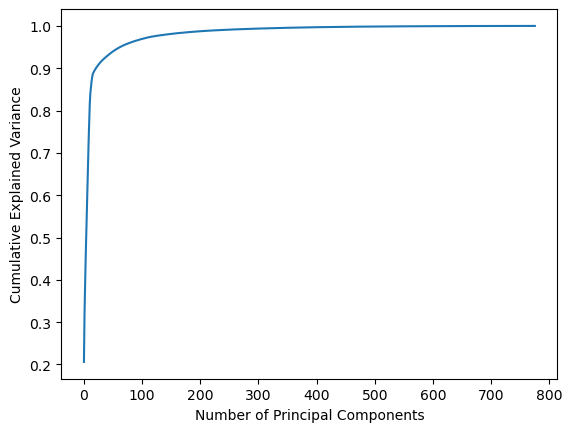

In [79]:
# Plotting the PCA to ge better understanding of the components 

%matplotlib inline

plt.plot(np.cumsum(var_ratios))
plt.xlabel('Number of Principal Components', fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Cumulative Explained Variance', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [80]:
# Extracting the components that retain the most variance
# The treshold set is of to maintain 95% of variance

n_components = np.argmax(np.cumsum(var_ratios) >= 0.95) + 1
n_components

64

In [81]:
# Transforming the data

X_pca = pca.transform(X_preprocessed)[:, :n_components]
X_pca

array([[-2.51371445e-02, -1.00052235e+00, -1.32141200e-01, ...,
        -3.38778863e-02,  3.62635560e-02, -9.67720512e-02],
       [ 1.25375166e+00, -3.32346408e-01, -2.21851453e+00, ...,
         2.22263474e-02, -3.10802677e-03,  3.24835623e-02],
       [-2.36905392e+00,  4.98235034e+00,  2.96792685e+00, ...,
         2.17479644e-01, -2.32772968e-01, -1.07187760e-01],
       ...,
       [-1.15538932e-01,  9.58405351e-02, -3.73669101e-01, ...,
        -8.33663497e-02,  3.08934787e-02, -8.11785487e-02],
       [-1.78701877e+00,  2.55894657e-01,  9.54724773e-01, ...,
        -6.87605315e-02,  5.48183416e-02,  1.55121557e-01],
       [-3.05657448e+00, -1.84340206e+00, -1.22282641e-01, ...,
         2.20646422e-02, -4.21291895e-02, -2.09958160e-03]])

### Modelling

In [82]:
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

In [83]:
## Train test split
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size=0.2, random_state=12)


In [84]:

lr = LinearRegression()
lr.fit(X_pca_train, y_pca_train)
y_pred_lm = lr.predict(X_pca_test)



In [86]:
# Evaluation metrics 

mae = mean_absolute_error(y_pca_test, y_pred_lm)
mse = mean_squared_error(y_pca_test, y_pred_lm)
r2 = r2_score(y_pca_test, y_pred_lm)
rmse = np.sqrt(mse)

print('Linear Regression Model Results:')
print('Mean Absolute Error (MAE) is {:.2f}.'.format(mae))
print('Mean Squared Error (MSE) is {:.2f}.'.format(mse))
print('Root Mean Squared Error (RMSE) is {:.2f}.'.format(rmse))
print('R2_score is {:.2f}.'.format(r2))

Linear Regression Model Results:
Mean Absolute Error (MAE) is 22.40.
Mean Squared Error (MSE) is 2106.08.
Root Mean Squared Error (RMSE) is 45.89.
R2_score is 0.06.


In [87]:
pd.Series(y_pred_lm).describe()

count    30000.000000
mean         5.485360
std         13.600283
min       -207.843665
25%         -0.255808
50%          5.178466
75%         10.587378
max        198.147709
dtype: float64

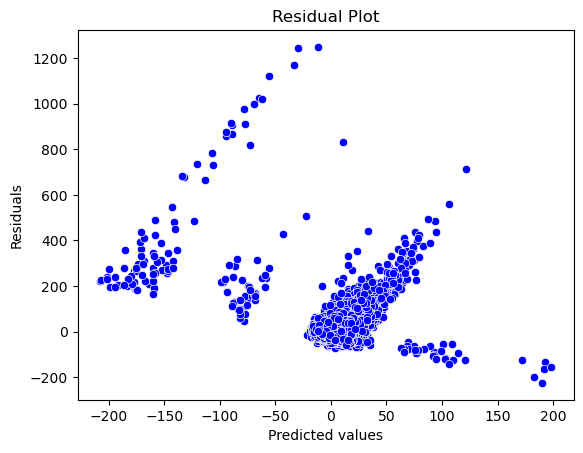

In [88]:
# Plotting the residuals against the predicted values

residuals = y_pca_test - y_pred_lm
sns.scatterplot(x=y_pred_lm, y=residuals, color='blue')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Ridge CV

In [89]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=[0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 4.5, 5.0, 5.5, 6.0])
ridge.fit(X_pca_train, y_pca_train)
y_pred_ridge_cv = ridge.predict(X_pca_test)

# Metrics

mae_ridge_cv = mean_absolute_error(y_pca_test, y_pred_ridge_cv)
mse_ridge_cv = mean_squared_error(y_pca_test, y_pred_ridge_cv)
rmse_ridge_cv = np.sqrt(mse_ridge_cv)
r2_ridge_cv = r2_score(y_pca_test, y_pred_ridge_cv)

print('Ridge Regression Model Results:')
print('Mean Absolute Error (MAE) is {:.2f}.'.format(mae_ridge_cv))
print('Mean Squared Error (MSE) is {:.2f}.'.format(mse_ridge_cv))
print('Root Mean Squared Error (RMSE) is {:.2f}.'.format(rmse_ridge_cv))
print('R2_score is {:.2f}.'.format(r2_ridge_cv))
print("Best Alpha :", ridge.alpha_)

Ridge Regression Model Results:
Mean Absolute Error (MAE) is 22.40.
Mean Squared Error (MSE) is 2106.01.
Root Mean Squared Error (RMSE) is 45.89.
R2_score is 0.06.
Best Alpha : 6.0


In [90]:

# Using Best alpha: 6.0

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=6) 
ridge.fit(X_pca_train, y_train)
y_pred_ridge = ridge.predict(X_pca_test)

# Calculating some evaluation metrics

mae_ridge = mean_absolute_error(y_pca_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_pca_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_pca_test, y_pred_ridge)

print('Ridge Regression Results:')
print('Mean Absolute Error (MAE) is {:.2f}.'.format(mae_ridge))
print('Mean Squared Error (MSE) is {:.2f}.'.format(mse_ridge))
print('Root Mean Squared Error (RMSE) is {:.2f}.'.format(rmse_ridge))
print('R-squared is {:.2f}.'.format(r2_ridge))


Ridge Regression Results:
Mean Absolute Error (MAE) is 22.40.
Mean Squared Error (MSE) is 2106.01.
Root Mean Squared Error (RMSE) is 45.89.
R-squared is 0.06.


## Random Forest Regressor

In [ ]:

# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, n_jobs=-1,random_state=100)
rfr.fit(X_pca_train, y_pca_train)



In [93]:
y_pred_rfr = rfr.predict(X_pca_test)

In [94]:
#  Evaluation metrics  

mae_rfr = mean_absolute_error(y_pca_test, y_pred_rfr)
mse_rfr = mean_squared_error(y_pca_test, y_pred_rfr)
r2_rfr = r2_score(y_pca_test, y_pred_rfr)
rmse_rfr = np.sqrt(mse_rfr)

print('Random Forest Regressor Results:')
print('Mean Absolute Error (MAE) is {:.2f}.'.format(mae_rfr))
print('Mean Squared Error (MSE) is {:.2f}.'.format(mse_rfr))
print('Root Mean Squared Error (RMSE) is {:.2f}.'.format(rmse_rfr))
print('R-squared (R2) is {:.2f}.'.format(r2_rfr))


Random Forest Regressor Results:
Mean Absolute Error (MAE) is 11.97.
Mean Squared Error (MSE) is 449.04.
Root Mean Squared Error (RMSE) is 21.19.
R-squared (R2) is 0.80.


## Decision tree regressor

In [95]:
# Modeling with the Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=100)
dt.fit(X_pca_train, y_pca_train)
y_pred_dt = dt.predict(X_pca_test)



In [96]:
# Evaluation metrics 

mae_dt = mean_absolute_error(y_pca_test, y_pred_dt)
mse_dt = mean_squared_error(y_pca_test, y_pred_dt)
r2_dt = r2_score(y_pca_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

print('Decision Tree Regressor Results:')
print('Mean Absolute Error (MAE) is {:.2f}.'.format(mae_dt))
print('Mean Squared Error (MSE) is {:.2f}.'.format(mse_dt))
print('Root Mean Squared Error (RMSE) is {:.2f}.'.format(rmse_dt))
print('R-squared is {:.2f}.'.format(r2_dt))

Decision Tree Regressor Results:
Mean Absolute Error (MAE) is 17.29.
Mean Squared Error (MSE) is 963.79.
Root Mean Squared Error (RMSE) is 31.04.
R-squared is 0.57.


## SVM

In [ ]:
from sklearn.svm import SVR

svmr = SVR(kernel='rbf')
svmr.fit(X_pca_train, y_pca_train)
y_pred_svmr = svmr.predict(X_pca_test)



In [ ]:
# Calculating some evaluation metrics

mae_svmr = mean_absolute_error(y_pca_test, y_pred_svmr)
mse_svmr = mean_squared_error(y_pca_test, y_pred_svmr)
rmse_svmr = np.sqrt(mse_svm)
r2_svmr = r2_score(y_pca_test, y_pred_svmr)

print('Support Vector Machines Results:')
print('Mean Absolute Error (MAE) is {:.2f}.'.format(mae_svmr))
print('Mean Squared Error (MSE) is {:.2f}.'.format(mse_svmr))
print('Root Mean Squared Error (RMSE) is {:.2f}.'.format(rmse_svmr))
print('R-squared (R2) is {:.2f}.'.format(r2_svmr))

======================================================================
## Stretch Tasks

### Multiclass Classification

The target variables are **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY**. We need to do additional transformations because these variables are not binary but continuos. For each flight that was delayed, we need to have one of these variables as 1 and others 0.

It can happen that we have two types of delays with more than 0 minutes. In this case, take the bigger one as 1 and others as 0.

### Binary Classification

The target variable is **CANCELLED**. The main problem here is going to be huge class imbalance. We have only very little cancelled flights with comparison to all flights. It is important to do the right sampling before training and to choose correct evaluation metrics.